In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pp = pd.read_excel(r"C:\Users\KAsab\Downloads\Compressed\combined+cycle+power+plant\CCPP\Folds5x2_pp.xlsx")
# AT = temperature, AP = ambient pressure, RH = relative humidity, V = exhaust vacuum, PE = net hourly electrical energy output


In [10]:
pp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
pp.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [12]:
pp.shape

(9568, 5)

In [13]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [15]:
X = pp.iloc[:,:4]
y = pp.iloc[:,-1]

In [16]:
X.sample(5)

,AT,V,AP,RH
6254,25.28,49.50,1013.95,52.79
9198,14.84,43.69,1016.31,68.67
2551,30.50,66.75,1017.55,38.20
1594,16.70,50.66,1014.86,94.87
781,17.29,42.86,1014.38,72.30


In [17]:
y.sample(5)

6442    453.76
8381    460.44
5629    488.02
1763    467.04
2598    463.64
Name: PE, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state =0)

In [22]:
from sklearn.linear_model import LinearRegression

In [25]:
ml = LinearRegression()

In [26]:
ml.fit(X_train,y_train)

LinearRegression()

In [28]:
y_preds = ml.predict(X_test)

In [29]:
y_preds

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
print("R Squared: ",r2_score(y_test,y_preds))

R Squared:  0.9304112159477682


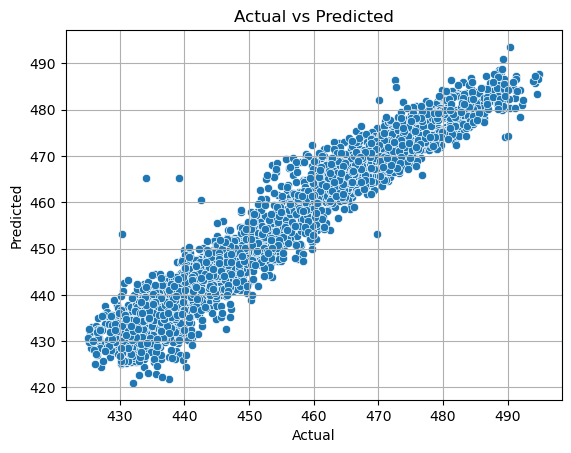

In [36]:
sns.scatterplot(
    x = y_test,
    y = y_preds
)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()

In [37]:
model_df = pd.DataFrame({"observed":y_test,"predicted":y_preds,"residuals":y_test-y_preds})

In [38]:
model_df.head(10)

,observed,predicted,residuals
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
9482,432.68,429.676856,3.003144
9,477.50,473.017115,4.482885
4986,459.68,456.532373,3.147627
6168,477.50,474.342524,3.157476
3664,444.99,446.364396,-1.374396


<Axes: xlabel='predicted', ylabel='residuals'>

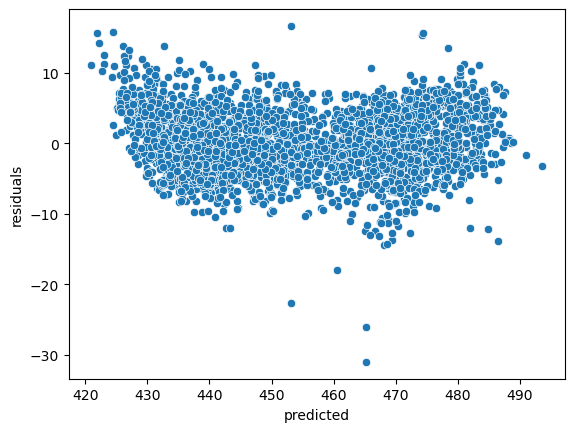

In [40]:
sns.scatterplot(
    data = model_df,
    x = "predicted",
    y = "residuals"
)

<Axes: xlabel='predicted', ylabel='residuals'>

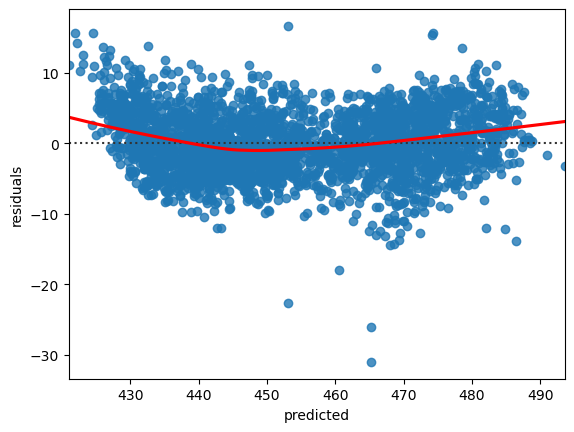

In [42]:
sns.residplot(
    data = model_df,
    x = "predicted",
    y = 'residuals',
    lowess = True,
    line_kws = {"color":"red"}
)